<a href="https://colab.research.google.com/github/student-pubali/Kth-Nearest-Neighbor/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
X=data.iloc[:,2:4].values
X.shape

(9, 2)

In [10]:
Y=data.iloc[:,-1].values
Y.shape

(9,)

The second part is you will divide your entire data into two parts training and test for cross validation

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.20)
X_train.shape


(7, 2)

In [15]:
X_test.shape

(2, 2)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.49907363,  1.38456152],
       [ 0.22372266, -0.89589275],
       [-0.74000572,  1.23253124],
       [-0.25814153,  0.51038739],
       [ 2.3318785 , -1.27596846],
       [-0.74000572, -0.93390032],
       [-0.31837456, -0.02171861]])

In [20]:
X_test = scaler.transform(X_test)
X_test

array([[3.0e+01, 5.0e+04],
       [4.6e+01, 1.2e+04]])

Now calculate the value of k
Using the first method
we simply find out the sqrt of the number of rows inside the training set

In [24]:
np.sqrt(X_train.shape[0])

2.6457513110645907

In [25]:
k = 2


In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=2)

In [28]:
Y_pred = knn.predict(X_test)
Y_pred.shape

(2,)

In [29]:
Y_test.shape

(2,)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

1.0

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[2]])

In [36]:
#2nd method
accuracy = []
n_samples = len(X_train)  # Number of samples in the training set

for i in range(1, min(10, n_samples + 1)):  # Loop through valid neighbor counts
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    accuracy.append(accuracy_score(Y_test, knn.predict(X_test)))

len(accuracy)  # This will contain the accuracy score for different values of n_neighors

7

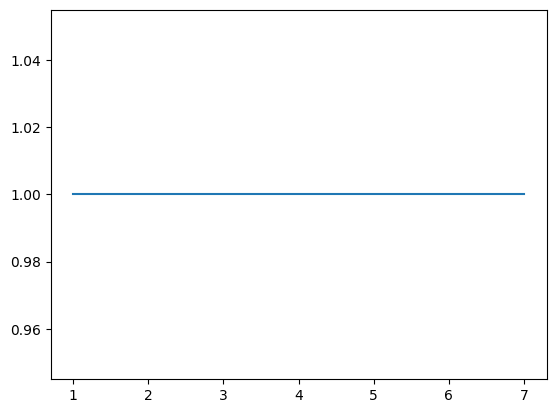

In [37]:
plt.plot(range(1,min(10,n_samples+1)),accuracy)

In [47]:
# n_samples = len(X_train)
# n_neighbors = min(11,n_samples)
# knn= kNeighborsClassifire(n_neighbors= n_neighbors)
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

1.0